In [1]:
# !pip list

In [2]:
# # installing dependencies
# ! pip install -U pandas pandas-profiling scikit-learn --no-cache-dir

In [3]:
import pandas as pd
# import pandas_profiling

/home/ashik/Downloads/everythingElse/ReliSource/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_7779/3826459295.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [4]:
# Read the CSV file into a DataFrame
train_data =  pd.read_csv('data/train.csv')
train_data

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6,y
0,0,A 0,B0,C2,D1,100,E1,F2,237000
1,1,A1,B0,C11,D4,100,E4,F2,86193
2,2,A0,B0,C18,D0,0,E0,F2,169200
3,3,A2,B0,C11,D1,100,E1,F2,58000
4,4,A0,B0,C67,D1,0,E1,F2,235000
...,...,...,...,...,...,...,...,...,...
2623,2623,A1,B0,C2,D1,0,E1,F2,102100
2624,2624,A0,B0,C8,D1,0,E1,F2,129300
2625,2625,A0,BO,C7,D1,100,E1,F2,275300
2626,2626,A0,B0,C11,D1,100,E1,F2,150000


In [5]:
test_data =  pd.read_csv('data/test.csv')

In [6]:
train_data.head()

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6,y
0,0,A 0,B0,C2,D1,100,E1,F2,237000
1,1,A1,B0,C11,D4,100,E4,F2,86193
2,2,A0,B0,C18,D0,0,E0,F2,169200
3,3,A2,B0,C11,D1,100,E1,F2,58000
4,4,A0,B0,C67,D1,0,E1,F2,235000


In [7]:
# ummary statistics of the numerical columns:
train_data.describe()

,UID,col_4,y
count,2628.000000,2628.000000,2628.000000
mean,1313.500000,46.308980,137642.657154
std,758.782578,48.558188,62886.926575
min,0.000000,0.000000,5132.000000
25%,656.750000,0.000000,95000.000000
50%,1313.500000,0.000000,135000.000000
75%,1970.250000,100.000000,176325.000000
max,2627.000000,100.000000,423000.000000


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2628 entries, 0 to 2627
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UID     2628 non-null   int64 
 1   col_0   2489 non-null   object
 2   col_1   2542 non-null   object
 3   col_2   2628 non-null   object
 4   col_3   2628 non-null   object
 5   col_4   2628 non-null   int64 
 6   col_5   2628 non-null   object
 7   col_6   2516 non-null   object
 8   y       2628 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 184.9+ KB


In [9]:
train_data.shape

(2628, 9)

In [10]:
# Assuming train_data is DataFrame
train_data = train_data.drop_duplicates()

In [11]:
# Check for missing values
missing_values = train_data.isnull().sum()
print(missing_values)
# Check for missing values
total_missing_values = train_data.isnull().sum().sum()
print(f'Total missing values: {total_missing_values}')



UID        0
col_0    139
col_1     86
col_2      0
col_3      0
col_4      0
col_5      0
col_6    112
y          0
dtype: int64
Total missing values: 337


In [12]:
# Check for missing values
missing_values_test_data = test_data.isnull().sum()
print(missing_values_test_data)
# Check for missing values
total_missing_values_test_data = test_data.isnull().sum().sum()
print(f'Total missing values: {total_missing_values_test_data}')

UID       0
col_0    67
col_1    34
col_2     0
col_3     0
col_4     0
col_5     0
col_6    48
dtype: int64
Total missing values: 149


## Custome Functions

In [13]:
# Function to check if a value is a string
def is_string(value):
    return isinstance(value, str)

# Function to check if a string contains spaces
def contains_spaces(s):
    return ' ' in s

# Loop through all columns and remove trailing whitespace for string columns
# Remove spaces between words in the 'TextColumn'
# Function to remove spaces between words and remove trailing whitespace for object type columns
def rm_spaces(dataframe):
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':  # Check if the column contains strings
            dataframe[column] = dataframe[column].str.strip()
            dataframe[column] = dataframe[column].str.replace(' ', '')

    return dataframe


def count_string_and_non_string_values(data_frame):

    # Get a list of column names with object (string) data type
    string_columns = data_frame.select_dtypes(include=['object']).columns

    # Initialize lists to store non-string values and their locations
    non_string_values = []
    non_string_locations = []

    # Apply the function to each element in the DataFrame, count the results, and collect non-string values
    string_count = data_frame[string_columns].applymap(is_string).sum().sum()
    for col in string_columns:
        non_string_col = data_frame[col][data_frame[col].apply(lambda x: not is_string(x))]
        non_string_values.extend(non_string_col)
        non_string_locations.extend([(col, idx) for idx in non_string_col.index])

    # Return the counts and non-string values
    return {
        'Count of string values': string_count,
        'Count of non-string values': len(non_string_values),
        'Non-string values': non_string_values,
        'Non-string value locations': non_string_locations
    }

def status_of_space(dataframe):
    # Get a list of column names with object (string) data type
    string_columns = dataframe.select_dtypes(include=['object']).columns


    # Apply the function to each element in the DataFrame and count the results
    string_count = dataframe[string_columns].applymap(is_string).sum().sum()
    non_string_count = dataframe[string_columns].applymap(lambda x: not is_string(x)).sum().sum()

    # Print the counts
    print(f'Count of string values: {string_count}')
    print(f'Count of non-string values: {non_string_count}')

    # Convert mixed columns to string columns
    strdata = dataframe[string_columns].astype(str)

    # Apply the function to each element in the selected columns and sum the results
    count_with_spaces = strdata[string_columns].applymap(contains_spaces).sum().sum()

    # Print the count of strings with spaces
    print(f'Count of strings with spaces: {count_with_spaces}')

def replace_null_with_missing(dataframe):
    return dataframe.fillna("Missing")

def replace_values_in_columns(df, replacements):
    """
    Replace specified values in the specified columns of a DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame.
    replacements (dict): A dictionary where keys are column names and values are dictionaries
                         specifying old and new values to replace.

    Returns:
    DataFrame: The DataFrame with values replaced in specified columns.
    """
    for column, replace_dict in replacements.items():
        old_value = replace_dict.get('old_value', None)
        new_value = replace_dict.get('new_value', None)
        if old_value is not None and new_value is not None:
            df[column] = df[column].replace(old_value, new_value)
    return df

def split_columns_into_parts(df, columns_to_split):
    """
    Split specified columns into their numerical and string parts in a DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame.
    columns_to_split (list): A list of column names to split.

    Returns:
    DataFrame: The DataFrame with split columns.
    """
    for col in columns_to_split:
        num_part, str_part = zip(*df[col].apply(lambda x: ("".join(filter(str.isdigit, x)), "".join(filter(str.isalpha, x)))))
        df[f'{col}_numerical'] = num_part
        df[f'{col}_string'] = str_part
        df.drop(columns=[col], inplace=True)
    
    return df


def dataset_processing(dataframe):
    dataframe = rm_spaces(dataframe)
    dataframe = replace_null_with_missing(dataframe)
    replacements = {
    'col_0': {'old_value': 'AO', 'new_value': 'A0'},
    'col_1': {'old_value': 'BO', 'new_value': 'B0'},
    'col_6': {'old_value': 'FO', 'new_value': 'F0'}
    }
    dataframe = replace_values_in_columns(dataframe, replacements)
    columns_to_split = ['col_0', 'col_1', 'col_2', 'col_3', 'col_5', 'col_6']
    dataframe = split_columns_into_parts(dataframe, columns_to_split)


    return dataframe

In [14]:
replacements = {
    'col_0': {'old_value': 'AO', 'new_value': 'A0'},
    'col_1': {'old_value': 'BO', 'new_value': 'B0'},
    'col_6': {'old_value': 'FO', 'new_value': 'F0'}
}


train_data = replace_values_in_columns(train_data, replacements)

In [ ]:
# Example usage:
# Assuming df is your DataFrame and columns_to_split is a list of columns to split
columns_to_split = ['col_0', 'col_1', 'col_2', 'col_3', 'col_5', 'col_6']
train_data = split_columns_into_parts(train_data, columns_to_split)


In [15]:
processed_train_data = dataset_processing(train_data)

processed_test_data = dataset_processing(test_data)

In [16]:
processed_test_data.head(40)

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6
0,2628,A0,B0,C11,D1,100,E1,F2
1,2629,A0,B0,C11,D1,0,E1,F2
2,2630,A0,B0,C11,D1,100,E1,F2
3,2631,A0,B0,C26,D1,100,E1,F0
4,2632,A0,B0,C11,D1,100,E1,Missing
5,2633,A0,B0,C2,D1,100,E1,F2
6,2634,A0,B0,C11,D1,0,E1,F2
7,2635,A1,Missing,C2,D12,50,E11,F2
8,2636,A0,B0,C11,D1,0,E1,F0
9,2637,A0,B0,C9,D1,0,E1,F2


In [17]:
nan_valus_results = count_string_and_non_string_values(train_data)
print(nan_valus_results)

{'Count of string values': 15431, 'Count of non-string values': 337, 'Non-string values': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

## Before removing spaces

In [18]:
status_of_space(train_data)

Count of string values: 15431
Count of non-string values: 337
Count of strings with spaces: 0


## After removing spaces

In [19]:
train_data = rm_spaces(train_data)

status_of_space(train_data)

Count of string values: 15431
Count of non-string values: 337
Count of strings with spaces: 0


In [20]:
nan_valus_results = count_string_and_non_string_values(train_data)
print(nan_valus_results)

{'Count of string values': 15431, 'Count of non-string values': 337, 'Non-string values': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [21]:
# # Assuming you have a DataFrame named 'train_data'
# # You can export it to a CSV file named 'cleaned_train_data.csv' like this:
# train_data.to_csv('data/cleaned_train_data_removeinsidespace.csv', index=False)
processed_train_data.to_csv('data/cleaned_train_data_fixed_0ando.csv', index=False)
# # If you want to include the index in the CSV file, remove the 'index=False' parameter.


In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2628 entries, 0 to 2627
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UID     2628 non-null   int64 
 1   col_0   2489 non-null   object
 2   col_1   2542 non-null   object
 3   col_2   2628 non-null   object
 4   col_3   2628 non-null   object
 5   col_4   2628 non-null   int64 
 6   col_5   2628 non-null   object
 7   col_6   2516 non-null   object
 8   y       2628 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 184.9+ KB


In [23]:
unique_values = train_data.nunique()
print(unique_values)


UID      2628
col_0       4
col_1       4
col_2      90
col_3      68
col_4       3
col_5      67
col_6       3
y         836
dtype: int64


In [24]:

# # train_data[['col_0','col_1']].fillna('Missing', inplace=True)
# train_data['col_0'] = train_data['col_0'].fillna('Missing')
# train_data['col_1'] = train_data['col_1'].fillna('Missing')
# train_data['col_6'] = train_data['col_6'].fillna('Missing')

In [25]:
missing_values = train_data.isnull().sum()
missing_values

UID        0
col_0    139
col_1     86
col_2      0
col_3      0
col_4      0
col_5      0
col_6    112
y          0
dtype: int64

In [26]:
# checking status after changing
unique_values = train_data.nunique()
print(unique_values)

UID      2628
col_0       4
col_1       4
col_2      90
col_3      68
col_4       3
col_5      67
col_6       3
y         836
dtype: int64


In [27]:
train_data.head(60)

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6,y
0,0,A0,B0,C2,D1,100,E1,F2,237000
1,1,A1,B0,C11,D4,100,E4,F2,86193
2,2,A0,B0,C18,D0,0,E0,F2,169200
3,3,A2,B0,C11,D1,100,E1,F2,58000
4,4,A0,B0,C67,D1,0,E1,F2,235000
5,5,A0,B0,C11,D1,100,E1,F2,170000
6,6,A0,B0,C11,D1,100,E1,F0,183600
7,7,A0,B0,C4,D1,0,E1,F2,100000
8,8,A0,B0,C2,D1,100,E1,F2,175000
9,9,A0,B0,C2,D1,100,E1,F2,136000


In [28]:
# # Assuming df is your DataFrame
# train_data['col_0'] = train_data['col_0'].replace('AO', 'A0')
# train_data['col_1'] = train_data['col_1'].replace('BO', 'B0')
# train_data['col_6'] = train_data['col_6'].replace('FO', 'F0')

# def replace_values_in_columns(df, replacements):
#     """
#     Replace specified values in the specified columns of a DataFrame.

#     Parameters:
#     df (DataFrame): The input DataFrame.
#     replacements (dict): A dictionary where keys are column names and values are dictionaries
#                          specifying old and new values to replace.

#     Returns:
#     DataFrame: The DataFrame with values replaced in specified columns.
#     """
#     for column, replace_dict in replacements.items():
#         old_value = replace_dict.get('old_value', None)
#         new_value = replace_dict.get('new_value', None)
#         if old_value is not None and new_value is not None:
#             df[column] = df[column].replace(old_value, new_value)
#     return df

# Example usage:
# Assuming train_data is your DataFrame
# Specify the columns and replacement values as a dictionary
# replacements = {
#     'col_0': {'old_value': 'AO', 'new_value': 'A0'},
#     'col_1': {'old_value': 'BO', 'new_value': 'B0'},
#     'col_6': {'old_value': 'FO', 'new_value': 'F0'}
# }


# train_data = replace_values_in_columns(train_data, replacements)

In [29]:
# # Assuming you have a DataFrame named 'train_data'
# # You can export it to a CSV file named 'cleaned_train_data.csv' like this:
# train_data.to_csv('data/cleaned_train_data_fixmissing.csv', index=False)

# # If you want to include the index in the CSV file, remove the 'index=False' parameter.


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# train_data['col_4'].hist()
# plt.show()

In [32]:

# # histogram of 'Y'
# train_data['y'].hist()
# plt.show()

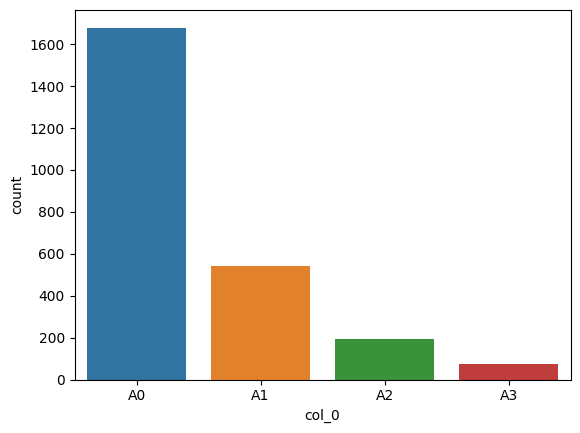

In [33]:
# Example: Visualize counts of 'col_0'
sns.countplot(data=train_data, x='col_0')
plt.show()

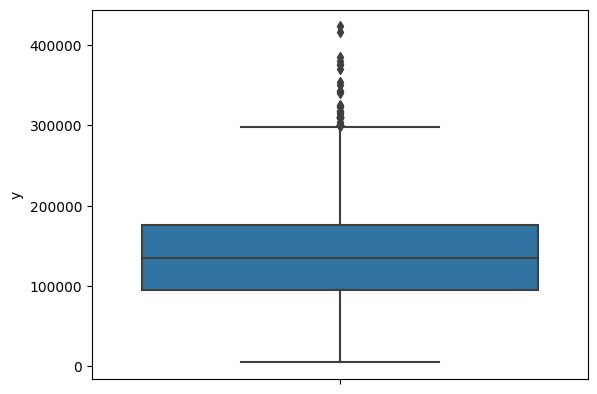

In [34]:
# Example: Visualize 'y' values using a boxplot
sns.boxplot(data=train_data, y='y')
plt.show()

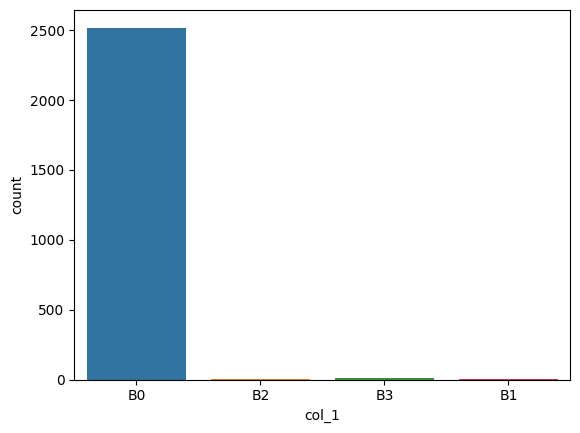

In [35]:
# Example: Visualize counts of 'col_1'
sns.countplot(data=train_data, x='col_1')
plt.show()

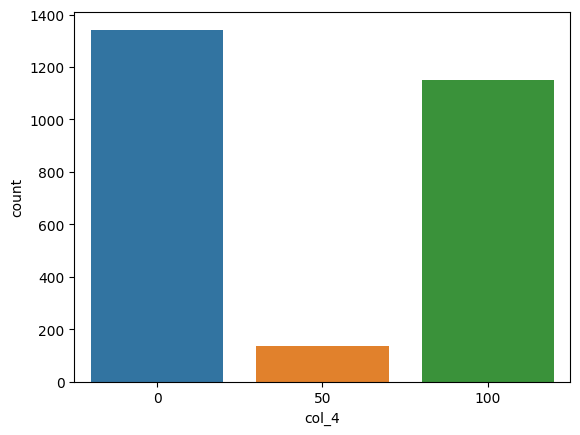

In [36]:
# Example: Visualize counts of 'col_4'
sns.countplot(data=train_data, x='col_4')
plt.show()

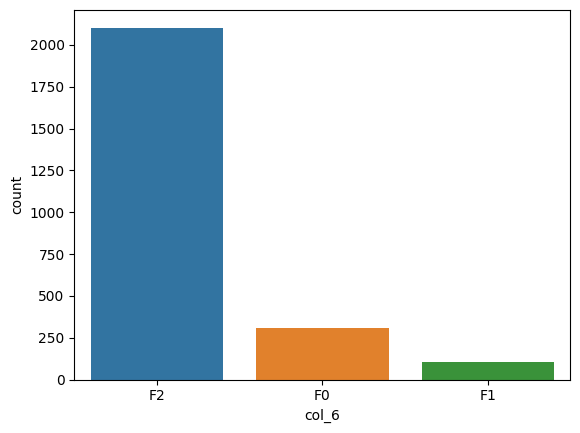

In [37]:
# Example: Visualize counts of 'col_6'
sns.countplot(data=train_data, x='col_6')
plt.show()

In [38]:
# # Example: Visualize pairwise relationships for numerical columns
# sns.pairplot(data=train_data[['col_3', 'col_4', 'col_6', 'y']])
# plt.show()

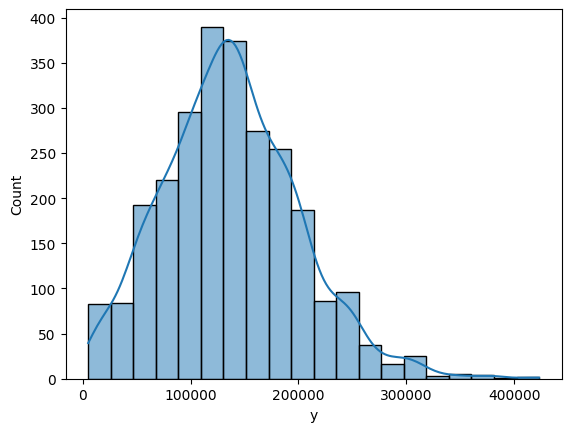

In [39]:
# Example: Visualize the distribution of 'y' values
sns.histplot(data=train_data, x='y', bins=20, kde=True)
plt.show()

In [40]:
# Assuming df is your DataFrame and 'col_name' is the name of the column you want to count unique values in
unique_value_counts_col_6 = train_data['col_6'].value_counts()

# Display the unique value counts
print(unique_value_counts_col_6)

col_6
F2    2104
F0     309
F1     103
Name: count, dtype: int64


In [41]:
# # Replacing all 'FO' to 'F0' cause in test set there is no 'FO' value
# train_data['col_6'] = train_data['col_6'].replace('FO', 'F0')


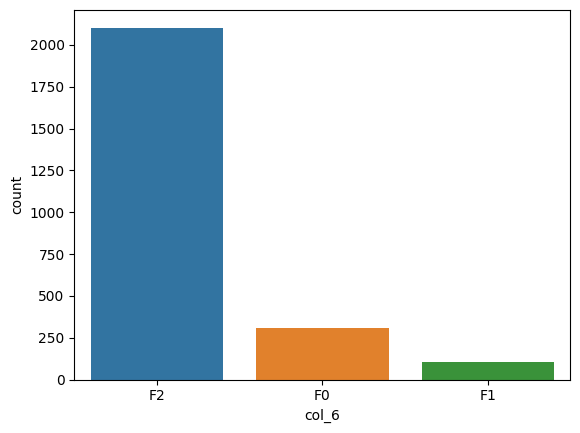

In [42]:
# Example: Visualize counts of 'col_6'
sns.countplot(data=train_data, x='col_6')
plt.show()

In [43]:
# col_3      68
# col_5      67
# Assuming df is your DataFrame and 'col_name' is the name of the column you want to count unique values in
unique_value_counts_col_2 = train_data['col_2'].value_counts()

# Display the unique value counts
print(unique_value_counts_col_2)

col_2
C11    728
C2     587
C4     416
C9     204
C15     77
      ... 
C62      1
C63      1
C92      1
C76      1
C66      1
Name: count, Length: 90, dtype: int64


In [44]:

# # Print both the unique values and their counts
# for value, count in unique_value_counts_col_2.items():
#     print(f'Value: {value}, Count: {count}')

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2628 entries, 0 to 2627
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UID     2628 non-null   int64 
 1   col_0   2489 non-null   object
 2   col_1   2542 non-null   object
 3   col_2   2628 non-null   object
 4   col_3   2628 non-null   object
 5   col_4   2628 non-null   int64 
 6   col_5   2628 non-null   object
 7   col_6   2516 non-null   object
 8   y       2628 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 184.9+ KB


In [46]:
# Get a list of column names with object (string) data type
string_columns = train_data.select_dtypes(include=['object']).columns

# df_encoded = pd.get_dummies(train_data, columns=['categorical_column'])
df_encoded = pd.get_dummies(processed_train_data, columns=string_columns)


In [47]:
string_columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_5', 'col_6'], dtype='object')

In [48]:
df_encoded_test = pd.get_dummies(processed_test_data, columns=string_columns)

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
for items in df_encoded_test.columns:
    print(f'{items}')

UID
col_4
col_0_A0
col_0_A1
col_0_A2
col_0_A3
col_0_Missing
col_1_B0
col_1_B1
col_1_B2
col_1_B3
col_1_Missing
col_2_C0
col_2_C1
col_2_C11
col_2_C12
col_2_C13
col_2_C15
col_2_C17
col_2_C18
col_2_C19
col_2_C2
col_2_C20
col_2_C21
col_2_C25
col_2_C26
col_2_C27
col_2_C28
col_2_C29
col_2_C3
col_2_C30
col_2_C32
col_2_C33
col_2_C34
col_2_C35
col_2_C36
col_2_C38
col_2_C39
col_2_C4
col_2_C41
col_2_C42
col_2_C44
col_2_C45
col_2_C46
col_2_C47
col_2_C49
col_2_C5
col_2_C50
col_2_C52
col_2_C53
col_2_C54
col_2_C56
col_2_C57
col_2_C59
col_2_C6
col_2_C63
col_2_C65
col_2_C66
col_2_C69
col_2_C7
col_2_C70
col_2_C72
col_2_C73
col_2_C76
col_2_C78
col_2_C8
col_2_C84
col_2_C85
col_2_C87
col_2_C9
col_3_D0
col_3_D1
col_3_D10
col_3_D11
col_3_D12
col_3_D13
col_3_D15
col_3_D16
col_3_D17
col_3_D18
col_3_D19
col_3_D2
col_3_D20
col_3_D22
col_3_D23
col_3_D24
col_3_D25
col_3_D26
col_3_D29
col_3_D3
col_3_D33
col_3_D37
col_3_D39
col_3_D4
col_3_D41
col_3_D42
col_3_D43
col_3_D44
col_3_D45
col_3_D46
col_3_D48
col_3_D5
col_3_

In [51]:
df_encoded_test.head(40)

,UID,col_4,col_0_A0,col_0_A1,col_0_A2,col_0_A3,col_0_Missing,col_1_B0,col_1_B1,col_1_B2,...,col_5_E64,col_5_E65,col_5_E66,col_5_E68,col_5_E8,col_5_E9,col_6_F0,col_6_F1,col_6_F2,col_6_Missing
0,2628,100,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2629,0,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2630,100,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2631,100,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,2632,100,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
5,2633,100,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
6,2634,0,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
7,2635,50,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
8,2636,0,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
9,2637,0,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [52]:
df_encoded.head(40)

,UID,col_4,y,col_0_A0,col_0_A1,col_0_A2,col_0_A3,col_0_Missing,col_1_B0,col_1_B1,...,col_5_E69,col_5_E7,col_5_E70,col_5_E71,col_5_E8,col_5_E9,col_6_F0,col_6_F1,col_6_F2,col_6_Missing
0,0,100,237000,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,1,100,86193,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,2,0,169200,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,3,100,58000,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,4,0,235000,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
5,5,100,170000,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
6,6,100,183600,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
7,7,0,100000,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
8,8,100,175000,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
9,9,100,136000,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [53]:
for items in df_encoded.columns:
    print(f'{items}')

UID
col_4
y
col_0_A0
col_0_A1
col_0_A2
col_0_A3
col_0_Missing
col_1_B0
col_1_B1
col_1_B2
col_1_B3
col_1_Missing
col_2_C0
col_2_C1
col_2_C10
col_2_C11
col_2_C12
col_2_C13
col_2_C14
col_2_C15
col_2_C16
col_2_C17
col_2_C18
col_2_C19
col_2_C2
col_2_C20
col_2_C21
col_2_C22
col_2_C23
col_2_C24
col_2_C25
col_2_C26
col_2_C27
col_2_C28
col_2_C29
col_2_C3
col_2_C30
col_2_C31
col_2_C33
col_2_C34
col_2_C35
col_2_C36
col_2_C37
col_2_C38
col_2_C39
col_2_C4
col_2_C40
col_2_C41
col_2_C42
col_2_C43
col_2_C44
col_2_C45
col_2_C46
col_2_C47
col_2_C48
col_2_C49
col_2_C5
col_2_C50
col_2_C51
col_2_C52
col_2_C53
col_2_C54
col_2_C55
col_2_C56
col_2_C57
col_2_C58
col_2_C59
col_2_C6
col_2_C60
col_2_C61
col_2_C62
col_2_C63
col_2_C64
col_2_C65
col_2_C66
col_2_C67
col_2_C68
col_2_C69
col_2_C7
col_2_C70
col_2_C71
col_2_C72
col_2_C74
col_2_C75
col_2_C76
col_2_C77
col_2_C78
col_2_C79
col_2_C8
col_2_C80
col_2_C81
col_2_C82
col_2_C83
col_2_C85
col_2_C86
col_2_C87
col_2_C88
col_2_C89
col_2_C9
col_2_C90
col_2_C91
col_2_C9